<a href="https://colab.research.google.com/github/IrisFDTD/OPTICS-UNIZAR/blob/main/Topic_9/chapter9_interference_slit_array.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"></span> The following notes written by  <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (<sergut@unizar.es>) </span>. Distributed under  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">License Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>

```
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






---
# **Óptica - Tema 9 - Redes de difraccion**

---

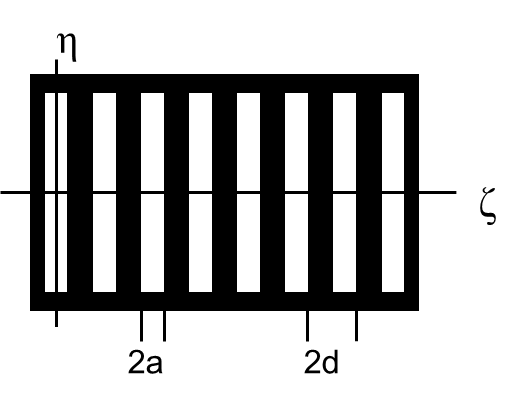

$I_P=cte \, I(\alpha_P) \, D(\alpha_P)$

where:
+ $I(\alpha_P)=\dfrac{\sin(N k \alpha_P d)^2}{\sin(k \alpha_P d)^2}$
+ $D(\alpha_P)=\dfrac{\sin(k \alpha_P a)^2}{(k \alpha_P a)^2}$


# Slit array diffraction

In [ ]:
import numpy as np
def D(xp, yp, P, a, lambda_nm):
  '''
  For (xs,ys)=(0,0)
  '''
  k = 2.0 * np.pi / (lambda_nm*1e-9)
  alfa_p=xp/np.sqrt(xp**2+P**2) #sin(theta)
  tolerance=1e-9 # To avoid Zero Division Errors
  U=k*a*alfa_p + tolerance
  return (np.sin(U)/U)**2

def I(xp, yp, P, N,d, lambda_nm):
  '''
  For (xs,ys)=(0,0)
  '''
  k = 2.0 * np.pi / (lambda_nm*1e-9)
  alfa_p=xp/np.sqrt(xp**2+P**2) #sin(theta)
  tolerance=1e-9 # To avoid Zero Division Errors
  W=k*d*alfa_p + tolerance
  return (np.sin(N*W)/np.sin(W))**2

def diffraction_slits(xp, yp, P, a,d,N,lambda_nm):
  return D(xp, yp, P, a,lambda_nm)*I(xp, yp, P, N,d, lambda_nm)/N**2 #Normalized to 1

# Parameters (geometry)

In [ ]:
P = 1.0e-2 # m
a=1e-5             # m
d=a*2           # m
N = 6
cte = 1.0          # Amplitude (arbitrary units)
tolerance=0.0 #1e-9 # To avoid Zero Division Errors

# Diffraction pattern at $\varphi=0$ (both analytic and numerical)

In [ ]:
def calc_diff_pattern_phi0(Xp=500,lambda_nm=600.0):
    m=2
    alfa_min_D=lambda_nm*1e-9/(2.0*a) # First minimum of D as a function of sen(theta)
    alfa_max_I=lambda_nm*1e-9/(2.0*d) # First maximum of I as a function of sen(theta)
    xpm = m*P*alfa_min_D
    print('1st Min. Difraction at lambda/2a=',alfa_min_D)
    print('1st Máx. Interference at lambda/2d=',alfa_max_I)
    print('gamma (width)=',lambda_nm*1e-9/(N*d))
    diff_pattern = []
    for i in range(Xp):
      #print("iteration",i,' of ',Xp)
      xp=xpm * (Xp - 2 * i) / Xp + tolerance
      alfa_p=xp/np.sqrt(xp**2+P**2)
      yp=tolerance
      D_=  D(xp, yp, P, a,   lambda_nm)
      I_=  I(xp, yp, P, N,d, lambda_nm)
      diff_pattern.append([xp,alfa_p,D_,I_,cte*D_*I_])
    return np.array(diff_pattern)

diff_pattern=calc_diff_pattern_phi0(Xp=5000,lambda_nm=500.0)

1st Min. Difraction at lambda/2a= 0.025
1st Máx. Interference at lambda/2d= 0.0125
gamma (width)= 0.004166666666666667


## Plot static figure

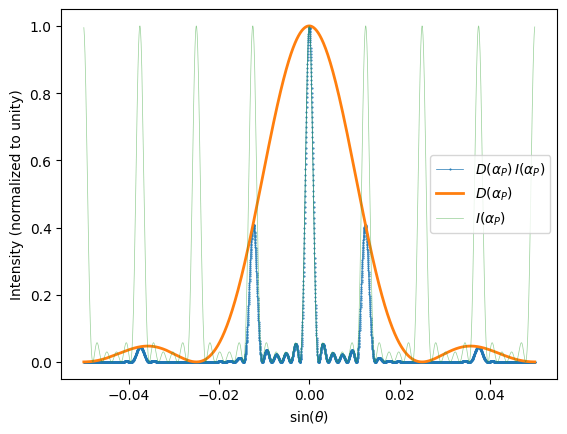

In [ ]:
import matplotlib.pyplot as plt

x=diff_pattern[:,0]
alfa_p=diff_pattern[:,1]
D_plot=diff_pattern[:,2]
I_plot=diff_pattern[:,3]/np.max(diff_pattern[:,3]) # Normalized to 1
DI_plot=diff_pattern[:,4]/np.max(diff_pattern[:,4]) # Normalized to 1

plt.plot(alfa_p,DI_plot,label=r'$D(\alpha_P)\, I(\alpha_P)$',linewidth=0.5,marker='o',markersize=0.5)
plt.plot(alfa_p,D_plot,label=r'$D(\alpha_P)$',linewidth=2.0,marker='o',markersize=0.0)
plt.plot(alfa_p,I_plot,label=r'$I(\alpha_P)$',linewidth=0.5,marker='o',markersize=0.0,alpha=0.5)

plt.xlabel(r'$\sin(\theta)$')
plt.ylabel('Intensity (normalized to unity)')
plt.legend()
plt.show()

## Plot dynamic figure

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import SelectionSlider

def plot_function_with_sliders(f, labels, x_min, y_min,ref_x,max_y,value_scale):
    # Extract the parameter names from the function signature, excluding 'x'
    parameters = list(f.__code__.co_varnames)[1:f.__code__.co_argcount]

    # Create sliders for each parameter
    # Define the base, min exponent, and max exponent for the slider
    sliders = {}
    i=0
    for param in parameters:
        #print("parameter=",param)
        #print("[initial value, min, max, step]=",value_scale[i])
        sliders[param] = widgets.FloatSlider(value=value_scale[i][0],
                                             min=value_scale[i][1],
                                             max=value_scale[i][2],
                                             step=value_scale[i][3],
                                             description=param,
                                             readout_format='.3f')
        i+=1

    # Create sliders for x_max and y_max
    #print("xmax")
    #print("[initial value, min, max, step]=",value_scale[i])
    x_max_slider = widgets.FloatSlider(value=value_scale[i][0],
                                       min=value_scale[i][1],
                                       max=value_scale[i][2],
                                       step=value_scale[i][3],
                                       description='x scale',
                                       readout_format='.3f')
    #print("ymax")
    #print("[initial value, min, max, step]=",value_scale[i+1])
    y_max_slider = widgets.FloatSlider(value=value_scale[i+1][0],
                                       min=value_scale[i+1][1],
                                       max=value_scale[i+1][2],
                                       step=value_scale[i+1][3],
                                       description='y scale',
                                       readout_format='.3f')

    # Define a function to update the plot
    def update_plot(**kwargs):
        plt.figure(figsize=(8, 6))
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
        x = np.linspace(x_min-x_max_slider.value, abs(x_min)+x_max_slider.value, 5000)

        # Pass slider values as keyword arguments to the input function
        params = {param: slider.value for param, slider in sliders.items()}
        print(params)
        y = f(x, **params)

        alfa_p=x/np.sqrt(x**2+params['P']**2)
        x_=(x_min-x_max_slider.value)/ref_x
        alfa_p_min=x_/np.sqrt(x_**2+params['P']**2)
        x_=(abs(x_min)+x_max_slider.value)/ref_x
        alfa_p_max=x_/np.sqrt(x_**2+params['P']**2)

        alfa_min_D=params['lambda_nm']*1e-9/(2.0*params['a']) # First minimum of D as a function of sen(theta)
        alfa_max_I=params['lambda_nm']*1e-9/(2.0*params['d']) # First maximum of I as a function of sen(theta)

        print('1st Min. Difraction at lambda/2a=',alfa_min_D)
        print('1st Máx. Interference at lambda/2d=',alfa_max_I)
        print('gamma (width)=',params['lambda_nm']*1e-9/(params['N']*params['d']))
        plt.axvline(alfa_max_I,linewidth=0.5,color='red',linestyle='--')
        plt.axvline(-alfa_max_I,linewidth=0.5,color='red',linestyle='--')
        plt.plot(alfa_p, y/max_y)
        plt.plot(alfa_p, y/max_y,linewidth=0.1,marker='o',markersize=1.0)
        plt.grid(True)
        plt.xlim(alfa_p_min, alfa_p_max)
        plt.ylim(y_min, y_max_slider.value)
        plt.show()

    # Create an interactive plot with the sliders
    interactive_plot = interactive(update_plot, **sliders, x_max=x_max_slider, y_max=y_max_slider)
    return interactive_plot

In [ ]:
# Example of an input function
function=diffraction_slits #(xp, yp, P, a,d,N,lambda_nm)

lambda_nm=600.0 #nm
m=1
alfa_min_D=lambda_nm*1e-9/(2.0*a)  # First minimum of D as a function of sen(theta)
alfa_max_I=lambda_nm*1e-9/(2.0*d) # First maximum of I as a function of sen(theta)
xpm = m*P*alfa_min_D



# Define labels, axis limits, and initial parameter values
labels = [r'$\sin(\theta)$', "Intensity (norm.)"]
x_min =-xpm
y_min = 0.0
max_y = 1.0
ref_x = 1.0
# value_scale (each): [initial value, min,max,step]
value_scale=[[1e-9,1e-9,1e-9,0.0], # yp
             [P,0.1*P,10*P,0.1*P],   # P
             [a,0.1*a,10*a,0.1*a],   # a
             [d,0.1*a,10*a,0.1*a],   # d
             [3,1,15,1],   # N
             [lambda_nm,0.5*lambda_nm,3.0*lambda_nm,0.1*lambda_nm],      # lambda (wavelength) in nm
             [0.0,0.0,10*np.abs(x_min),0.1*np.abs(x_min)],    # x scale
             [1.0,0.01,5.0,0.5],    # y scale
             ]

# Create the interactive plot
interactive_plot = plot_function_with_sliders(function,
                                              labels,
                                              x_min, y_min,
                                              ref_x,max_y,
                                              value_scale)

# Display the interactive plot
interactive_plot

interactive(children=(FloatSlider(value=1e-09, description='yp', max=1e-09, min=1e-09, readout_format='.3f', s…